In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D,MaxPool2D, Dropout
from keras.utils import to_categorical
import cv2
import os

In [2]:
img = image.load_img("C:/Users/krish/cnn_software_project/basedata/training/color_image/4.jpg")

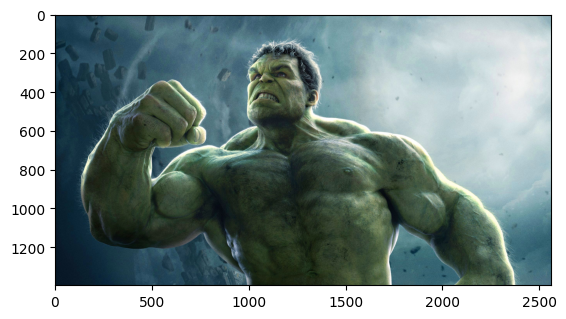

In [3]:
plt.imshow(img)

In [38]:
cv2.imread("C:/Users/krish/cnn_software_project/basedata/training/color_image/4.jpg")

array([[[ 87,  68,  33],
        [ 90,  71,  36],
        [ 99,  80,  45],
        ...,
        [184, 173, 143],
        [190, 179, 149],
        [173, 162, 132]],

       [[ 90,  71,  36],
        [ 88,  69,  34],
        [100,  81,  46],
        ...,
        [188, 177, 147],
        [196, 185, 155],
        [189, 178, 148]],

       [[ 95,  76,  41],
        [ 81,  62,  27],
        [ 84,  65,  30],
        ...,
        [180, 169, 139],
        [187, 176, 146],
        [190, 179, 149]],

       ...,

       [[ 37,  22,   6],
        [ 36,  21,   5],
        [ 35,  20,   4],
        ...,
        [133, 114,  76],
        [141, 122,  84],
        [139, 120,  82]],

       [[ 37,  22,   6],
        [ 35,  20,   4],
        [ 35,  20,   4],
        ...,
        [142, 123,  85],
        [140, 121,  83],
        [128, 109,  71]],

       [[ 38,  23,   7],
        [ 36,  21,   5],
        [ 36,  21,   5],
        ...,
        [131, 112,  74],
        [137, 118,  80],
        [131, 112,  74]]

In [4]:
#see the shape

cv2.imread("C:/Users/krish/cnn_software_project/basedata/training/color_image/4.jpg").shape

(1397, 2560, 3)

In [6]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [8]:
train_dataset = train.flow_from_directory("C:/Users/krish/cnn_software_project/basedata/training/",
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

validation_dataset = train.flow_from_directory("C:/Users/krish/cnn_software_project/basedata/validation/",
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [9]:
train_dataset.class_indices

{'blackwhite_image': 0, 'color_image': 1}

In [10]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
#create archietecture
model = Sequential()
#conv layer 1
model.add(Conv2D(16,(3,3), activation='relu', input_shape = (200,200,3)))
#pooling layer 1
model.add(MaxPool2D(pool_size = (2,2)))
#conv layer 2
model.add(Conv2D(32,(3,3), activation = 'relu'))
#pooling layer 2
model.add(MaxPool2D(pool_size = (2,2)))
#conv layer 3
model.add(Conv2D(64,(3,3), activation = 'relu'))
#pooling layer 3
model.add(MaxPool2D(pool_size = (2,2)))
#flatten layer
model.add(Flatten())
#adding a layer
model.add(Dense(512, activation = 'relu'))
#adding a layer
model.add(Dense(1, activation = 'sigmoid'))


In [13]:
model.compile(loss='binary_crossentropy', optimizer = RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

In [17]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 5,
                      epochs=30,
                      validation_data = validation_dataset)

Epoch 1/30
5/5 [==============================] - 4s 854ms/step - loss: 0.4462 - accuracy: 0.8571 - val_loss: 0.2666 - val_accuracy: 0.9500
Epoch 2/30
5/5 [==============================] - 4s 847ms/step - loss: 0.2207 - accuracy: 0.9286 - val_loss: 0.6348 - val_accuracy: 0.7000
Epoch 3/30
5/5 [==============================] - 5s 966ms/step - loss: 0.6153 - accuracy: 0.8571 - val_loss: 0.2249 - val_accuracy: 0.9500
Epoch 4/30
5/5 [==============================] - 5s 956ms/step - loss: 0.1348 - accuracy: 1.0000 - val_loss: 0.2674 - val_accuracy: 0.9000
Epoch 5/30
5/5 [==============================] - 5s 963ms/step - loss: 0.0749 - accuracy: 1.0000 - val_loss: 0.2014 - val_accuracy: 0.9500
Epoch 6/30
5/5 [==============================] - 4s 908ms/step - loss: 0.3176 - accuracy: 0.8667 - val_loss: 0.1338 - val_accuracy: 0.9000
Epoch 7/30
5/5 [==============================] - 5s 989ms/step - loss: 0.0340 - accuracy: 1.0000 - val_loss: 0.1942 - val_accuracy: 0.9000
Epoch 8/30
5/5 [====

In [40]:
validation_dataset.class_indices

{'blackwhite_image': 0, 'color_image': 1}

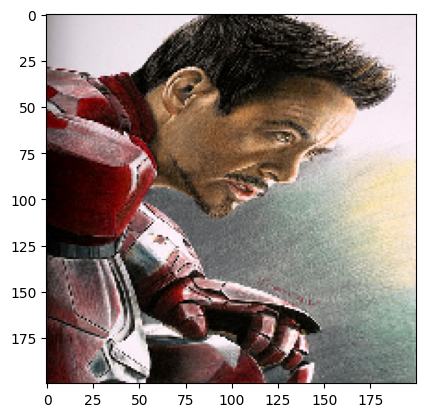

1/1 [==============================] - 0s 78ms/step
RGB IMAGES


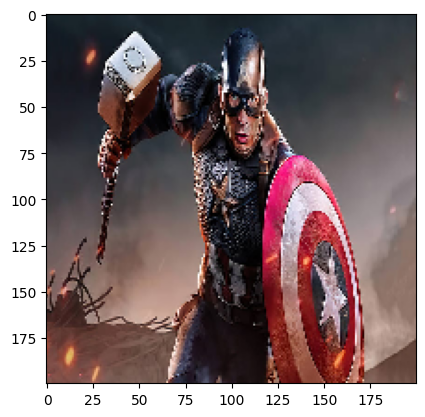

1/1 [==============================] - 0s 63ms/step
RGB IMAGES


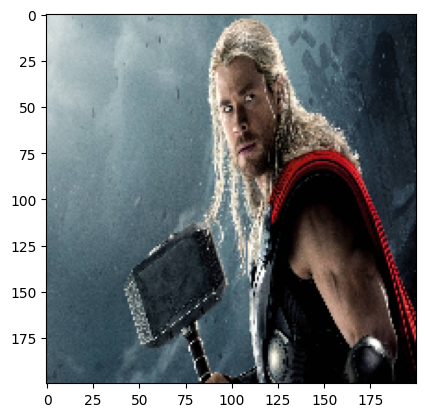

1/1 [==============================] - 0s 74ms/step
RGB IMAGES


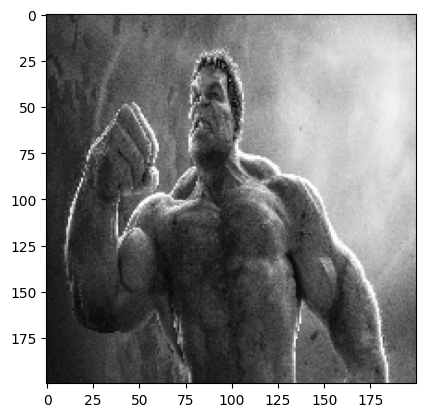

1/1 [==============================] - 0s 85ms/step
BLACK AND WHITE


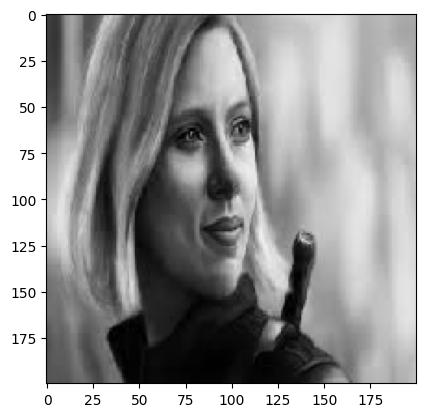

1/1 [==============================] - 0s 152ms/step
BLACK AND WHITE


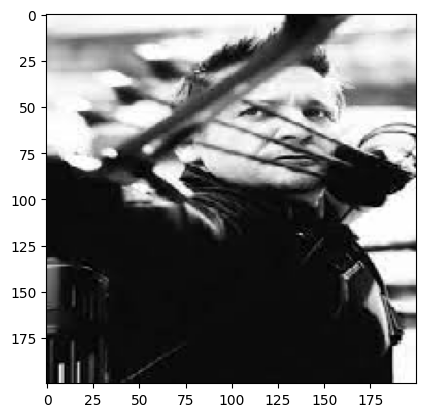

1/1 [==============================] - 0s 110ms/step
BLACK AND WHITE


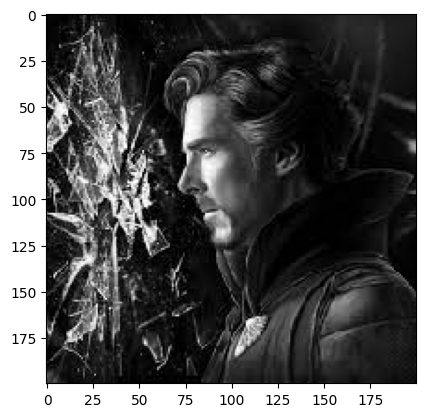

1/1 [==============================] - 0s 74ms/step
BLACK AND WHITE


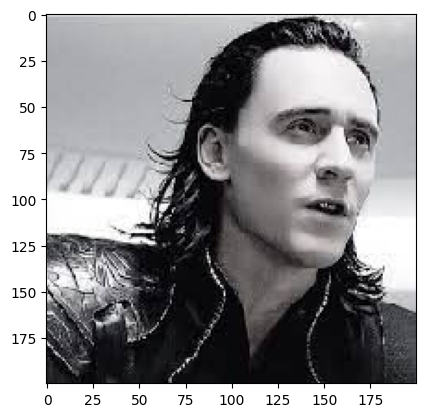

1/1 [==============================] - 0s 87ms/step
BLACK AND WHITE


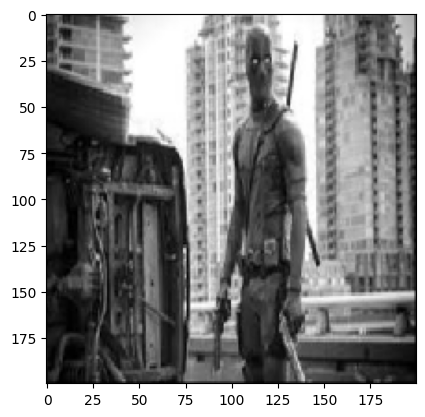

1/1 [==============================] - 0s 102ms/step
BLACK AND WHITE


In [44]:
dir_path = 'C:/Users/krish/cnn_software_project/basedata/testing'

for i in os.listdir(dir_path ):
   img = image.load_img(dir_path+'//'+i, target_size = (200,200))
   plt.imshow(img)
   plt.show()

   X = image.img_to_array(img)
   X = np.expand_dims(X,axis = 0)
   images = np.vstack([X])
   val = model.predict(images)

   if val == 0:
       print("BLACK AND WHITE")
   else:
       print("RGB IMAGES")
